In [4]:
import nba_api
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats
import matplotlib.pyplot as plt
import plotly.plotly as py

In [2]:
career = playercareerstats.PlayerCareerStats(player_id=201939)
detail = shotchartdetail.ShotChartDetail(player_id=201939, team_id=1610612744)

ValueError: attempted relative import beyond top-level package

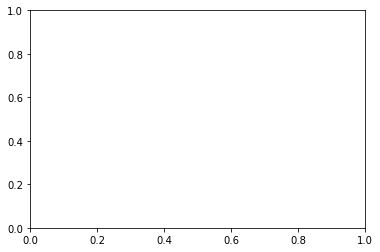

In [13]:
dfs = detail.get_data_frames()
curry_df = dfs[0]
filter_date = [True if '2018' in val[:4] else False for val in curry_df['GAME_DATE']]


fig, ax = plt.subplots(1,1)
from ..util.plotting import overlay_court
ax.scatter(curry_df[filter_date]['LOC_X'], curry_df[filter_date]['LOC_Y'])
#py.iplot_mpl(fig, filename='curryShotChart2k19')